In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("data/Yelp Restaurant Reviews.csv")

In [68]:
df

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


In [70]:
df.describe()

,Rating
count,19896.000000
mean,4.130830
std,1.200746
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [71]:
## checking if missing values:
df.isnull().sum()

Yelp URL       0
Rating         0
Date           0
Review Text    0
dtype: int64

In [72]:
##No missing values found

# Checking the outlier in the data

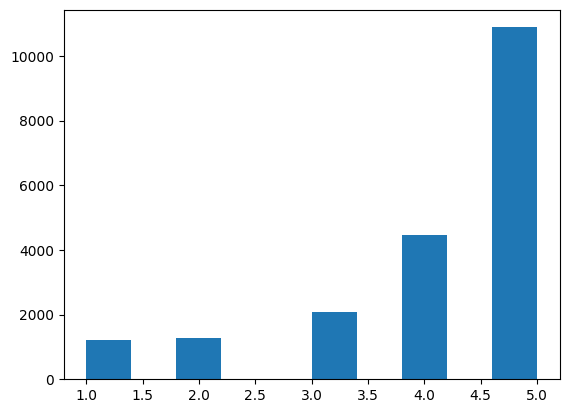

In [73]:
### Visualiting the distribution of ratingg data:
fx, ax = plt.subplots(figure=(10,8))
ax.hist(df["Rating"])
plt.show()

In [74]:
#for rating column:
z_scores = (df['Rating']- df['Rating'].mean())/df['Rating'].std()
z_scores

0        0.723858
1       -0.108957
2        0.723858
3       -0.108957
4        0.723858
           ...   
19891   -0.108957
19892   -0.108957
19893   -0.108957
19894    0.723858
19895   -0.108957
Name: Rating, Length: 19896, dtype: float64

In [75]:
z_scores.describe()

count    1.989600e+04
mean     3.799847e-16
std      1.000000e+00
min     -2.607404e+00
25%     -1.089575e-01
50%      7.238578e-01
75%      7.238578e-01
max      7.238578e-01
Name: Rating, dtype: float64

In [76]:
### removing the row with z_scores greater than threshold (2) 
threshold = 2
df_cleaned = df[(np.abs(z_scores) <= threshold)]

In [77]:
df_cleaned

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...


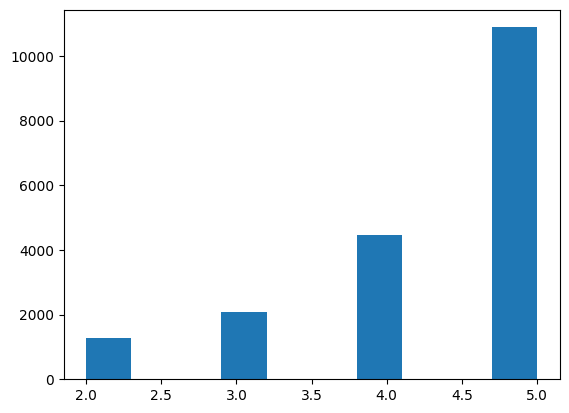

In [78]:
### Visualiting the distribution of ratingg data:
fx, ax = plt.subplots(figure=(10,8))
ax.hist(df_cleaned["Rating"])
plt.show()

### Here, the minority class data is detected:
1) Removed using z_score threshold (df_cleaned)
2) Can be kept to represent the minority class (df)

# For text preprocesssing:

In [101]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [81]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
### Punctations removing:

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df.apply(lambda row: tokenizer.tokenize(row["Review Text"]), axis = 1)
#result = tokenizer.tokenize("Wow! I am excited to learn data science")

In [84]:
df

,Yelp URL,Rating,Date,Review Text,tokens
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,"[All, I, can, say, is, they, have, very, good,..."
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,"[Nice, little, local, place, for, ice, cream, ..."
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,"[A, delicious, treat, on, a, hot, day, Staff, ..."
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,"[This, was, great, service, and, a, fun, crew,..."
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,"[This, is, one, of, my, favorite, places, to, ..."
...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...,"[Had, the, chocolate, cannoli, The, filling, w..."
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...,"[Love, apricot, croissant, I, bought, it, at, ..."
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...,"[Line, was, about, 25, people, long, It, went,..."
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...,"[Its, hard, not, to, order, everything, when, ..."


In [90]:
# ## tokenizing the review texts ;; word level tokesns
# tokens = word_tokenize(df["Review Text"][0])
# df["tokens"] = df.apply(lambda row: word_tokenize(row['tokens']), axis=1 )

In [91]:
tokens

['All',
 'I',
 'can',
 'say',
 'is',
 'they',
 'have',
 'very',
 'good',
 'ice',
 'cream',
 'I',
 'would',
 'for',
 'sure',
 'recommend',
 'their',
 'cookies',
 'and',
 'creme',
 'ice',
 'cream',
 'it',
 'is',
 'very',
 'good']

In [92]:
###length of tokens for each review text(each row)
df["tokens_length"] = df.apply(lambda row: len(row['tokens']), axis =1 )

In [93]:
df

,Yelp URL,Rating,Date,Review Text,tokens,tokens_length
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,"[All, I, can, say, is, they, have, very, good,...",26
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,"[Nice, little, local, place, for, ice, cream, ...",50
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,"[A, delicious, treat, on, a, hot, day, Staff, ...",26
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,"[This, was, great, service, and, a, fun, crew,...",73
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,"[This, is, one, of, my, favorite, places, to, ...",175
...,...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...,"[Had, the, chocolate, cannoli, The, filling, w...",20
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...,"[Love, apricot, croissant, I, bought, it, at, ...",71
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...,"[Line, was, about, 25, people, long, It, went,...",60
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...,"[Its, hard, not, to, order, everything, when, ...",31


In [99]:
### Removing stop words:
stop_words = set(stopwords.words('english'))
#df["filtered_tokens"] = df.apply(lambda row: [word for word in row['tokens'] if word.lower() not in stop_words] )
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

In [100]:
df

,Yelp URL,Rating,Date,Review Text,tokens,tokens_length,filtered_tokens
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,"[All, I, can, say, is, they, have, very, good,...",26,"[say, good, ice, cream, would, sure, recommend..."
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,"[Nice, little, local, place, for, ice, cream, ...",50,"[Nice, little, local, place, ice, cream, favor..."
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,"[A, delicious, treat, on, a, hot, day, Staff, ...",26,"[delicious, treat, hot, day, Staff, friendly, ..."
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,"[This, was, great, service, and, a, fun, crew,...",73,"[great, service, fun, crew, got, banana, cream..."
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,"[This, is, one, of, my, favorite, places, to, ...",175,"[one, favorite, places, get, ice, cream, CU, a..."
...,...,...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...,"[Had, the, chocolate, cannoli, The, filling, w...",20,"[chocolate, cannoli, filling, rich, delicious,..."
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...,"[Love, apricot, croissant, I, bought, it, at, ...",71,"[Love, apricot, croissant, bought, 4, 00, PM, ..."
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...,"[Line, was, about, 25, people, long, It, went,...",60,"[Line, 25, people, long, went, fast, variety, ..."
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...,"[Its, hard, not, to, order, everything, when, ...",31,"[hard, order, everything, come, good, also, or..."


In [106]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

In [107]:
## lemmatization of filtered tokens
lemmatizer=WordNetLemmatizer()
df["lemmatized_words"] = df["filtered_tokens"].apply(lambda filtered_tokens: [lemmatizer.lemmatize(i) for i in filtered_tokens] )

In [108]:
df

,Yelp URL,Rating,Date,Review Text,tokens,tokens_length,filtered_tokens,lemmatized_words
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,"[All, I, can, say, is, they, have, very, good,...",26,"[say, good, ice, cream, would, sure, recommend...","[say, good, ice, cream, would, sure, recommend..."
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,"[Nice, little, local, place, for, ice, cream, ...",50,"[Nice, little, local, place, ice, cream, favor...","[Nice, little, local, place, ice, cream, favor..."
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,"[A, delicious, treat, on, a, hot, day, Staff, ...",26,"[delicious, treat, hot, day, Staff, friendly, ...","[delicious, treat, hot, day, Staff, friendly, ..."
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,"[This, was, great, service, and, a, fun, crew,...",73,"[great, service, fun, crew, got, banana, cream...","[great, service, fun, crew, got, banana, cream..."
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,"[This, is, one, of, my, favorite, places, to, ...",175,"[one, favorite, places, get, ice, cream, CU, a...","[one, favorite, place, get, ice, cream, CU, ar..."
...,...,...,...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...,"[Had, the, chocolate, cannoli, The, filling, w...",20,"[chocolate, cannoli, filling, rich, delicious,...","[chocolate, cannoli, filling, rich, delicious,..."
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...,"[Love, apricot, croissant, I, bought, it, at, ...",71,"[Love, apricot, croissant, bought, 4, 00, PM, ...","[Love, apricot, croissant, bought, 4, 00, PM, ..."
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...,"[Line, was, about, 25, people, long, It, went,...",60,"[Line, 25, people, long, went, fast, variety, ...","[Line, 25, people, long, went, fast, variety, ..."
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...,"[Its, hard, not, to, order, everything, when, ...",31,"[hard, order, everything, come, good, also, or...","[hard, order, everything, come, good, also, or..."


# Exploratory Data Analysis

In [110]:
#mean, median, and standard deviation for numerical columns
df.describe()

,Rating,tokens_length
count,19896.000000,19896.000000
mean,4.130830,93.742360
std,1.200746,82.412826
min,1.000000,1.000000
25%,4.000000,39.000000
50%,5.000000,69.000000
75%,5.000000,121.000000
max,5.000000,977.000000


### ##Visualizing the improvement in the word tokenizing in normal tokens vs lemmatized tokens:

In [134]:
import seaborn as sns
from collections import Counter

def most_common_visualize(column_name):
     #Combining the  lists into a single list
    all_tokens = [token for tokens_list in df[column_name] for token in tokens_list]
    
    word_counts = Counter(all_tokens)

    ##top n20 most frequent words
    top_n = 20  
    most_common_words = word_counts.most_common(top_n)
    common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

    # bar plotfor visualizing the most common words
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
    plt.title(f'Top {top_n} Most Common Words in the {column_name} column')
    plt.xlabel('Word Count')
    plt.ylabel('Word')
    plt.show()


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


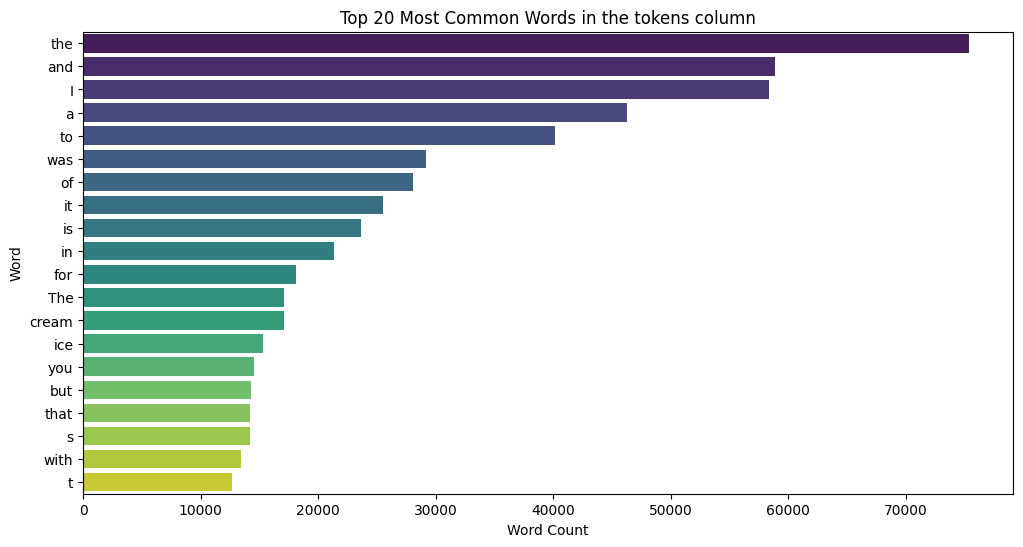

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


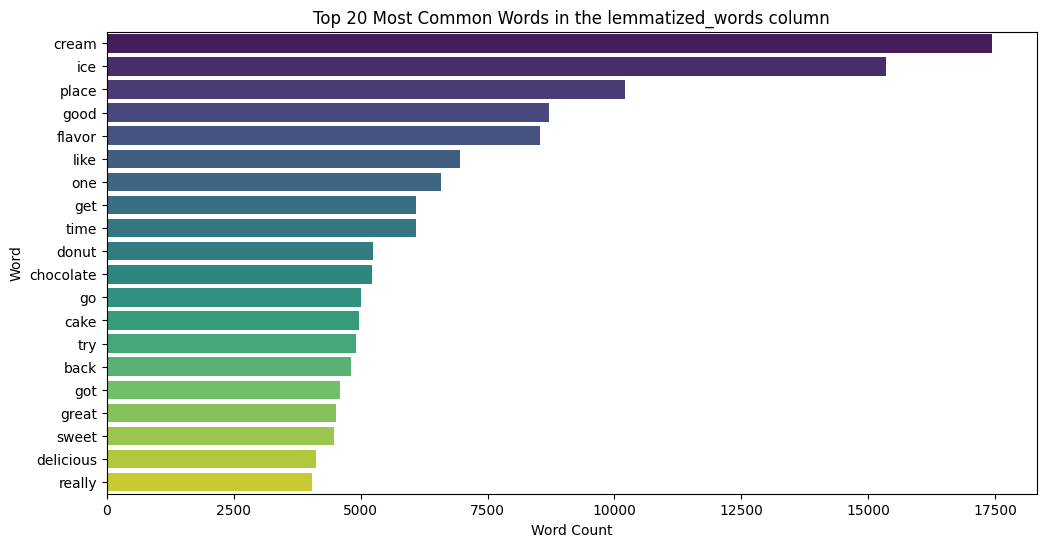

In [135]:
most_common_visualize("tokens")
most_common_visualize("lemmatized_words")

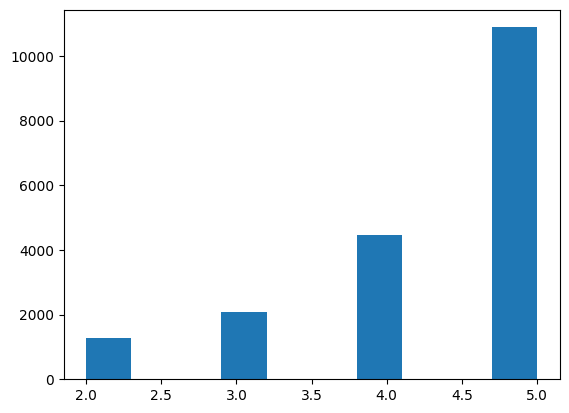

In [136]:
### Visualiting the distribution of ratingg data:
fx, ax = plt.subplots(figure=(10,8))
ax.hist(df_cleaned["Rating"])
plt.show()

## 

## Model Building and Training:

In [138]:
df

,Yelp URL,Rating,Date,Review Text,tokens,tokens_length,filtered_tokens,lemmatized_words
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,"[All, I, can, say, is, they, have, very, good,...",26,"[say, good, ice, cream, would, sure, recommend...","[say, good, ice, cream, would, sure, recommend..."
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,"[Nice, little, local, place, for, ice, cream, ...",50,"[Nice, little, local, place, ice, cream, favor...","[Nice, little, local, place, ice, cream, favor..."
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,"[A, delicious, treat, on, a, hot, day, Staff, ...",26,"[delicious, treat, hot, day, Staff, friendly, ...","[delicious, treat, hot, day, Staff, friendly, ..."
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,"[This, was, great, service, and, a, fun, crew,...",73,"[great, service, fun, crew, got, banana, cream...","[great, service, fun, crew, got, banana, cream..."
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,"[This, is, one, of, my, favorite, places, to, ...",175,"[one, favorite, places, get, ice, cream, CU, a...","[one, favorite, place, get, ice, cream, CU, ar..."
...,...,...,...,...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...,"[Had, the, chocolate, cannoli, The, filling, w...",20,"[chocolate, cannoli, filling, rich, delicious,...","[chocolate, cannoli, filling, rich, delicious,..."
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...,"[Love, apricot, croissant, I, bought, it, at, ...",71,"[Love, apricot, croissant, bought, 4, 00, PM, ...","[Love, apricot, croissant, bought, 4, 00, PM, ..."
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...,"[Line, was, about, 25, people, long, It, went,...",60,"[Line, 25, people, long, went, fast, variety, ...","[Line, 25, people, long, went, fast, variety, ..."
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...,"[Its, hard, not, to, order, everything, when, ...",31,"[hard, order, everything, come, good, also, or...","[hard, order, everything, come, good, also, or..."


In [140]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [142]:
X_train = vectorizer.fit_transform(df[''])

In [143]:
X_train

<19896x22501 sparse matrix of type '<class 'numpy.int64'>'
	with 1214829 stored elements in Compressed Sparse Row format>

In [173]:
#to categorize ratings
def categorize_rating(rating):
    if rating > 3:
        return "Positive"
    elif rating < 3:
        return "Negative"
    else:
        return "Neutral"
    
df['Sentiment'] = df['Rating'].apply(categorize_rating)
print(df[['Rating', 'Sentiment']])

       Rating Sentiment
0           5  Positive
1           4  Positive
2           5  Positive
3           4  Positive
4           5  Positive
...       ...       ...
19891       4  Positive
19892       4  Positive
19893       4  Positive
19894       5  Positive
19895       4  Positive

[19896 rows x 2 columns]


In [174]:
df["Sentiment"].value_counts()

Sentiment
Positive    15330
Negative     2497
Neutral      2069
Name: count, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

df['Lemmatized_Text'] = df['lemmatized_words'].apply(' '.join)

#   mapping from string labels to integer labels
sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}

# Map the string labels to integer labels in the DataFrame
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)


#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Lemmatized_Text'], df['Sentiment'], test_size=0.2, random_state=42)

#Create a CountVectorizer to convert lemmatized words to numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [160]:
print(X_train)


  (0, 6037)	1
  (0, 15830)	1
  (0, 4529)	4
  (0, 11893)	1
  (0, 14476)	1
  (0, 2964)	1
  (0, 4679)	2
  (0, 3383)	2
  (0, 2137)	1
  (0, 18400)	1
  (0, 13212)	1
  (0, 7619)	1
  (0, 2772)	1
  (0, 17436)	1
  (0, 7453)	2
  (0, 7114)	1
  (0, 13345)	1
  (0, 11395)	1
  (0, 18062)	1
  (0, 5959)	1
  (0, 16444)	1
  (0, 6048)	1
  (0, 9824)	1
  (0, 15116)	1
  (0, 16965)	1
  :	:
  (15915, 6175)	2
  (15915, 17786)	1
  (15915, 7522)	1
  (15915, 12485)	1
  (15915, 3452)	1
  (15915, 8029)	2
  (15915, 15941)	1
  (15915, 17175)	1
  (15915, 5222)	1
  (15915, 6034)	1
  (15915, 18327)	1
  (15915, 5006)	1
  (15915, 13674)	1
  (15915, 1360)	1
  (15915, 12228)	1
  (15915, 10323)	1
  (15915, 10633)	1
  (15915, 16172)	2
  (15915, 16241)	1
  (15915, 16560)	1
  (15915, 13324)	1
  (15915, 9004)	1
  (15915, 14555)	1
  (15915, 13312)	1
  (15915, 7711)	1


In [161]:
###Training Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB
#Training Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# predictions on the test data
y_pred = classifier.predict(X_test)

# model evaluation:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8437185929648241
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       516
           1       0.38      0.27      0.32       401
           2       0.90      0.96      0.93      3063

    accuracy                           0.84      3980
   macro avg       0.66      0.62      0.64      3980
weighted avg       0.82      0.84      0.83      3980



C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

In [162]:
# Create a Support Vector Machine (SVM) classifier]
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Accuracy: 0.8268844221105528
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       516
           1       0.34      0.33      0.34       401
           2       0.92      0.93      0.93      3063

    accuracy                           0.83      3980
   macro avg       0.63      0.62      0.63      3980
weighted avg       0.83      0.83      0.83      3980



C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

In [163]:
### XGBoost Classifier
from xgboost import XGBClassifier

# Create an XGBoost classifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

#Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)



C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy: 0.8457286432160804
              precision    recall  f1-score   support

           0       0.76      0.56      0.65       516
           1       0.45      0.22      0.29       401
           2       0.88      0.98      0.92      3063

    accuracy                           0.85      3980
   macro avg       0.70      0.59      0.62      3980
weighted avg       0.82      0.85      0.82      3980



C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\anaconda3\envs\tree-leaf\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

In [165]:
###Topic modeling using LDA:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Lemmatized_Text'])

# Applying LDA
num_topics = 5 # for now 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

#   top words for each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

topic_top_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_top_words.append(top_words)
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

# topics to the reviews
topic_assignments = lda.transform(dtm)
df['Topic'] = topic_assignments.argmax(axis=1)


result_df = pd.DataFrame({'Lemmatized_Text': df['Lemmatized_Text'], 'Review Text': df['Review Text'], 'Topic': df['Topic'], 'Sentiment Class': df['Sentiment']})
#print(result_df)


Topic #1: donut, time, line, order, place, good, like, service, people, customer
Topic #2: bakery, good, pastry, chocolate, croissant, coffee, like, macarons, sandwich, macaroon
Topic #3: cake, cupcake, milk, like, good, soft, chocolate, try, cereal, serve
Topic #4: cream, ice, flavor, place, good, chocolate, like, scoop, try, best
Topic #5: place, great, love, delicious, good, friendly, amazing, definitely, staff, coffee
                                         Lemmatized_Text  \
0      say good ice cream would sure recommend cooky ...   
1      Nice little local place ice cream favorite pum...   
2      delicious treat hot day Staff friendly helpful...   
3      great service fun crew got banana cream pie ch...   
4      one favorite place get ice cream CU area bit d...   
...                                                  ...   
19891  chocolate cannoli filling rich delicious canno...   
19892  Love apricot croissant bought 4 00 PM Normally...   
19893  Line 25 people long went fa

In [166]:
result_df

,Lemmatized_Text,Review Text,Topic,Sentiment Class
0,say good ice cream would sure recommend cooky ...,All I can say is they have very good ice cream...,3,2
1,Nice little local place ice cream favorite pum...,Nice little local place for ice cream.My favor...,3,2
2,delicious treat hot day Staff friendly helpful...,A delicious treat on a hot day! Staff was very...,4,2
3,great service fun crew got banana cream pie ch...,This was great service and a fun crew! I got t...,3,2
4,one favorite place get ice cream CU area bit d...,This is one of my favorite places to get ice c...,3,2
...,...,...,...,...
19891,chocolate cannoli filling rich delicious canno...,Had the chocolate cannoli! The filling was ric...,1,2
19892,Love apricot croissant bought 4 00 PM Normally...,Love apricot croissant! I bought it at 4:00 PM...,1,2
19893,Line 25 people long went fast variety pastry d...,Line was about 25 people long. It went fast! T...,1,2
19894,hard order everything come good also order Ins...,Its hard not to order everything when I come h...,0,2


## Visualizing each topics separately

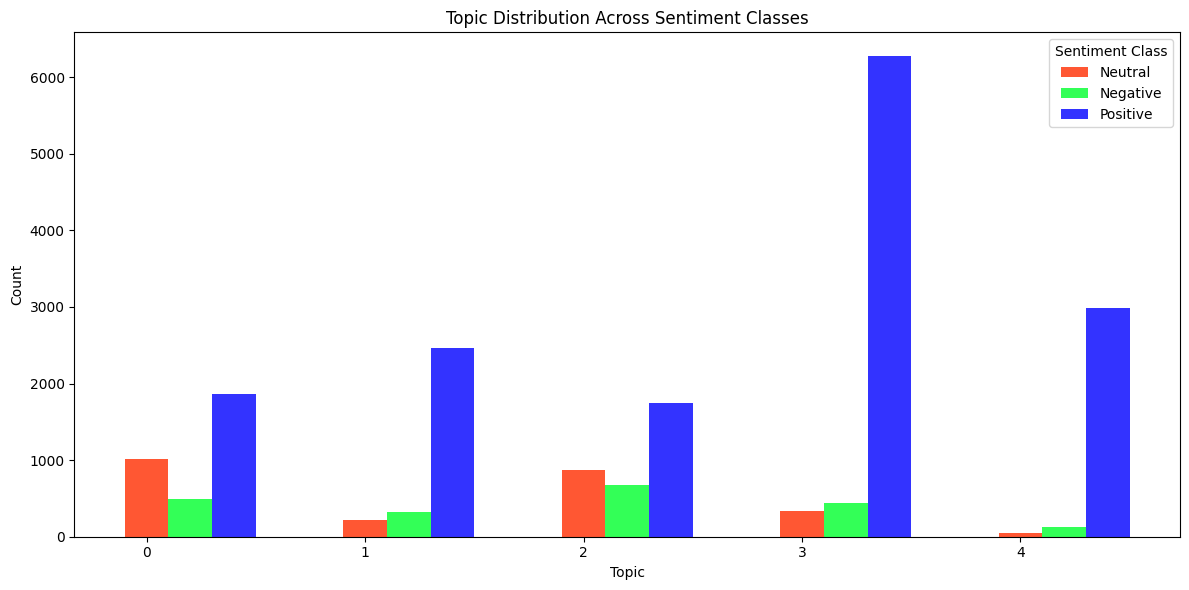

In [194]:

result_df['Topic'] = result_df['Topic'].astype(str)
result_df['Sentiment Class'] = result_df['Sentiment Class'].astype(str)

topic_sentiment_counts = result_df.groupby(['Topic', 'Sentiment Class']).size().unstack(fill_value=0)

#  grouped bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.2

bar_positions = range(len(topic_sentiment_counts))

#bars for each sentiment class
for sentiment, color in zip(topic_sentiment_counts.columns, ['#FF5733', '#33FF57', '#3333FF']):
    plt.bar(
        [pos + bar_width for pos in bar_positions],
        topic_sentiment_counts[sentiment],
        bar_width,
        label=sentiment,
        color=color
    )
    bar_positions = [pos+ bar_width for pos in bar_positions]

# Set the x-axis labels
topics = topic_sentiment_counts.index
x_positions = [pos + bar_width for pos in range(len(topic_sentiment_counts))]
plt.xticks(x_positions, topics)

# :abels and title
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Distribution Across Sentiment Classes')
plt.legend(title='Sentiment Class', labels=['Neutral', 'Negative', 'Positive'])


# Showing lplots:
plt.tight_layout()
plt.show()

### Insights
<h4>Sentiment Analysis Insights:</h4>

Average accuracy of 85%. <br>
Positive reviews are most common.<br>
Strong performance in identifying positive sentiments.<br>
Service issues are often mentioned in negative reviews.<br>

<h4>Topic Modeling Insights:</h4>

Topic #0: donut, time, line, order, place, good, like, service, people, customer <br>
Topic #1: bakery, good, pastry, chocolate, croissant, coffee, like, macarons, sandwich, macaroon <br>
Topic #2: cake, cupcake, milk, like, good, soft, chocolate, try, cereal, serve <br>
Topic #3: cream, ice, flavor, place, good, chocolate, like, scoop, try, best <br>
Topic #4: place, great, love, delicious, good, friendly, amazing, definitely, staff, coffee<br>
<br>
"Food Quality" is significant for positive reviews <br>
"Service" is a common issue in negative reviews. <br>
Emphasize "Value for Money" for marketing. <br>

Recommendations to restaurants from above insights:

Improve customer service. <br>
Highlight food quality in marketing. <br>
Use affordability as a marketing strategy. <br>